In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from SystemGeneral.system import System
from utils.utils import generate_series
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
from tqdm import tqdm_notebook as tqdm
rpy2_logger.setLevel(logging.ERROR)   # will display errors, but not warnings

warnings.filterwarnings('ignore')

Unable to determine R home: [WinError 2] Не удается найти указанный файл
Unable to determine R library path: Command '('D:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.
R[write to console]: Warning:
R[write to console]:  package 'Rssa' is in use and will not be installed

R[write to console]: Warning:
R[write to console]:  package 'Rssa' is in use and will not be installed



In [2]:
Q = 301
N = 800

# K = 30

In [15]:
column_names = ['\omega_1', '\omega_2', '\delta_min', '\sigma', 'B', 'T', 'L', 'FPR', 'TPR', 'FNR']
results = pd.DataFrame(columns=column_names)
# results.to_latex(escape=False)

In [18]:
%%time

w1 = 1/10
w1_str = f"1/10"
for denom in range(4, 10):
    w2 = 1/denom
    w2_str = f"1/{denom}"
    # sigma = 0.5

    delta_min = 1/50
    delta_min_str = "1/50"

    k = 30
    iter_num = 200

    np.random.seed(1234567)
    for sigma in np.arange(0, 0.8, 0.1):
        fp = 0
        fn = 0
        tp = 0
        for i in tqdm(range(iter_num), desc=f"Моделирование для sigma = {sigma}"):
            series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma, size=N)
            system = System(series, k, delta_min)
            Q_hat = system()
            if Q_hat - Q < 0:
                fp += 1
            if Q_hat - Q > k:
                fn += 1
            if Q_hat - Q <= k:
                tp += 1
        fpr = fp / iter_num
        fnr = fn / iter_num
        tpr = tp / iter_num
        results = results.append(dict(zip(column_names, [w1_str, w2_str, delta_min, sigma, system.B, system.T, system.L, fpr, tpr, fnr])), ignore_index=True)

Моделирование для sigma = 0.7000000000000001: 100%|██████████| 200/200 [06:13<00:00,  1.87s/it]

CPU times: total: 2h 28min 36s
Wall time: 2h 28min 41s


In [20]:
results

,\omega_1,\omega_2,\delta_min,\sigma,B,T,L,FPR,TPR,FNR
0,1/10,1/3,0.02,0.0,133,79,71,0.0,1.0,0.0
1,1/10,1/3,0.02,0.1,133,79,71,0.0,1.0,0.0
2,1/10,1/3,0.02,0.2,133,79,71,0.0,1.0,0.0
3,1/10,1/3,0.02,0.3,133,79,71,0.0,1.0,0.0
4,1/10,1/3,0.02,0.4,133,79,71,0.0,1.0,0.0
5,1/10,1/3,0.02,0.5,133,79,71,0.0,0.99,0.01
6,1/10,1/3,0.02,0.6,133,79,71,0.0,0.955,0.045
7,1/10,1/3,0.02,0.7,133,79,71,0.035,0.85,0.15
8,1/10,1/4,0.02,0.0,133,79,71,0.0,1.0,0.0
9,1/10,1/4,0.02,0.1,133,79,71,0.0,1.0,0.0


In [60]:
results.to_csv('results_extended_k=30.csv', index=False)

In [3]:
from copy import deepcopy

def prepare_to_latex(dataframe):
    res = deepcopy(dataframe)

    def parse_str(col):
        formatted_col = []
        for el in col:
            if isinstance(el, str):
                numer, denom = el.split('/')
                formatted_col.append(np.round(int(numer)/float(denom), 3))
            else:
                formatted_col.append(el)
        return formatted_col

    res = res.apply(lambda x: parse_str(x), axis=0)
    return res

# k = 15

In [4]:
column_names = ['\omega_1', '\omega_2', '\delta_min', '\sigma', 'B', 'T', 'L', 'FPR', 'TPR', 'FNR']
results_k15 = pd.DataFrame(columns=column_names)

In [5]:
%%time

w1 = 1/10
w1_str = f"1/10"
for denom in tqdm(range(3, 9), desc="Итерации для разных знаменателей"):
    w2 = 1/denom
    w2_str = f"1/{denom}"
    # sigma = 0.5

    delta_min = 1/50
    delta_min_str = "1/50"

    k = 15
    iter_num = 200

    np.random.seed(1234567)
    for sigma in tqdm(np.arange(0, 0.8, 0.1), desc=f"Итерации для разных sigma"):
        fp = 0
        fn = 0
        tp = 0
        for i in tqdm(range(iter_num), desc=f"Моделирование для sigma = {sigma}"):
            series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma, size=N)
            system = System(series, k, delta_min)
            Q_hat = system()
            if Q_hat - Q < 0:
                fp += 1
            if Q_hat - Q > k:
                fn += 1
            if Q_hat - Q <= k:
                tp += 1
        fpr = fp / iter_num
        fnr = fn / iter_num
        tpr = tp / iter_num
        results_k15 = results_k15.append(dict(zip(column_names, [w1_str, w2_str, delta_min, sigma, system.B, system.T, system.L, fpr, tpr, fnr])), ignore_index=True)

Итерации для разных знаменателей:   0%|          | 0/6 [00:00<?, ?it/s]

Итерации для разных sigma:   0%|          | 0/8 [00:00<?, ?it/s]

Моделирование для sigma = 0.0:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.1:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.2:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.30000000000000004:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.4:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.5:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.6000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.7000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Итерации для разных sigma:   0%|          | 0/8 [00:00<?, ?it/s]

Моделирование для sigma = 0.0:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.1:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.2:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.30000000000000004:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.4:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.5:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.6000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.7000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Итерации для разных sigma:   0%|          | 0/8 [00:00<?, ?it/s]

Моделирование для sigma = 0.0:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.1:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.2:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.30000000000000004:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.4:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.5:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.6000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.7000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Итерации для разных sigma:   0%|          | 0/8 [00:00<?, ?it/s]

Моделирование для sigma = 0.0:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.1:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.2:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.30000000000000004:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.4:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.5:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.6000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.7000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Итерации для разных sigma:   0%|          | 0/8 [00:00<?, ?it/s]

Моделирование для sigma = 0.0:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.1:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.2:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.30000000000000004:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.4:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.5:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.6000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.7000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Итерации для разных sigma:   0%|          | 0/8 [00:00<?, ?it/s]

Моделирование для sigma = 0.0:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.1:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.2:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.30000000000000004:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.4:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.5:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.6000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

Моделирование для sigma = 0.7000000000000001:   0%|          | 0/200 [00:00<?, ?it/s]

CPU times: total: 4h 51min 49s
Wall time: 4h 51min 59s


In [6]:
results_k15.to_csv('results_extended_k=15.csv', index=False)

In [11]:
results_k15_latex = prepare_to_latex(results_k15)
print(results_k15_latex.to_latex(escape=False, index=False))

\begin{tabular}{rrrrrrrrrr}
\toprule
 \omega_1 &  \omega_2 &  \delta_min &  \sigma &   B &  T &  L &   FPR &   TPR &   FNR \\
\midrule
      0.1 &     0.333 &        0.02 &     0.0 & 133 & 79 & 71 & 0.000 & 1.000 & 0.000 \\
      0.1 &     0.333 &        0.02 &     0.1 & 133 & 79 & 71 & 0.000 & 1.000 & 0.000 \\
      0.1 &     0.333 &        0.02 &     0.2 & 133 & 79 & 71 & 0.000 & 1.000 & 0.000 \\
      0.1 &     0.333 &        0.02 &     0.3 & 133 & 79 & 71 & 0.000 & 0.995 & 0.005 \\
      0.1 &     0.333 &        0.02 &     0.4 & 133 & 79 & 71 & 0.000 & 0.895 & 0.105 \\
      0.1 &     0.333 &        0.02 &     0.5 & 133 & 79 & 71 & 0.040 & 0.785 & 0.215 \\
      0.1 &     0.333 &        0.02 &     0.6 & 133 & 79 & 71 & 0.195 & 0.755 & 0.245 \\
      0.1 &     0.333 &        0.02 &     0.7 & 133 & 79 & 71 & 0.330 & 0.700 & 0.300 \\
      0.1 &     0.250 &        0.02 &     0.0 & 133 & 79 & 71 & 0.000 & 1.000 & 0.000 \\
      0.1 &     0.250 &        0.02 &     0.1 & 133 & 79 & 71 & 

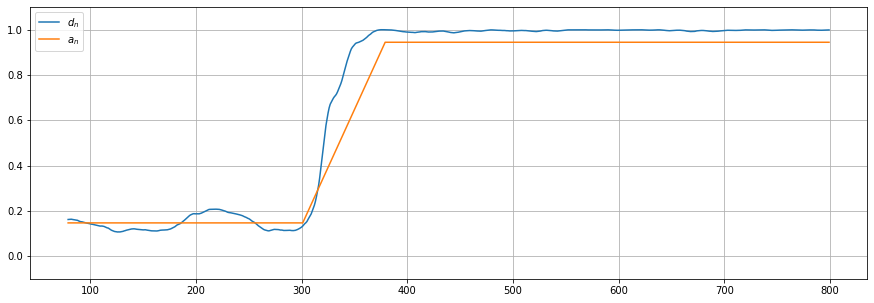

In [21]:
delta_min = 1/50
w2 = 1/7
k=15
np.random.seed(1234567)
sigma=0.3
series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma, size=N)
system = System(series, k, delta_min)
Q_hat = system()
print(Q_hat)

row = system.row

# Generate analytical approximation to row function
initial_value = system.initial_value
g_analytical = system.thresh


approx = [initial_value for i in range(Q-system.T)]
approx = [*approx, *g_analytical.transition_interval.tolist()]
approx = [*approx, *[g_analytical.value_after_heterogeneity for i in range(len(row) - len(approx))]]



X = np.arange(system.T, N)
w_min_str = r'$\omega_{min}$'
plt.figure(figsize=(15, 5))
plt.plot(X, row, label=r'$d_n$')
plt.plot(X, approx, label=r'$a_n$')
# plt.title(fr"$\omega_1$={w1}, $\omega_2$={w_min_str}={w2}, L={L}, B={B}, T={T_}, $\sigma^2={sigma_square}$")
plt.legend(loc='upper left')
plt.ylim((-0.1, 1.1))
plt.grid()
plt.show()

# k=45

In [22]:
column_names = ['\omega_1', '\omega_2', '\delta_min', '\sigma', 'B', 'T', 'L', 'FPR', 'TPR', 'FNR']
results_k45 = pd.DataFrame(columns=column_names)

In [ ]:
%%time

w1 = 1/10
w1_str = f"1/10"
for denom in tqdm(range(3, 9), desc="Итерации для разных знаменателей"):
    w2 = 1/denom
    w2_str = f"1/{denom}"
    # sigma = 0.5

    delta_min = 1/50
    delta_min_str = "1/50"

    k = 15
    iter_num = 200

    np.random.seed(1234567)
    for sigma in tqdm(np.arange(0, 0.8, 0.1), desc=f"Итерации для разных sigma, denom is {denom}"):
        fp = 0
        fn = 0
        tp = 0
        for i in tqdm(range(iter_num), desc=f"Моделирование для sigma = {sigma}"):
            series = generate_series(w1, w2, Q, N) + np.random.normal(scale=sigma, size=N)
            system = System(series, k, delta_min)
            Q_hat = system()
            if Q_hat - Q < 0:
                fp += 1
            if Q_hat - Q > k:
                fn += 1
            if Q_hat - Q <= k:
                tp += 1
        fpr = fp / iter_num
        fnr = fn / iter_num
        tpr = tp / iter_num
        results_k45 = results_k45.append(dict(zip(column_names, [w1_str, w2_str, delta_min, sigma, system.B, system.T, system.L, fpr, tpr, fnr])), ignore_index=True)

In [ ]:
results_k45.to_csv('results_extended_k=45.csv', index=False)

In [ ]:
results_k45_latex = prepare_to_latex(results_k45)
print(results_k45_latex)